# Normalized Consumption Visualizations

Clayton Miller - miller.clayton@gmail.com

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import timeit
import os
from datetime import datetime
from __future__ import division
from pylab import *
import matplotlib.dates as mdates
from matplotlib import ticker
import datetime
import matplotlib

In [2]:
sns.set_style("whitegrid")

In [3]:
%matplotlib inline

In [4]:
repos_path = "/Users/Clayton/temporal-features-for-buildings/"

In [5]:
meta = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

In [10]:
temp = pd.read_csv((os.path.join(repos_path,"data/interim/temp_open_utc_complete.csv")), index_col='timestamp', parse_dates=True).tz_localize('utc')

# Individual visualization

In [132]:
def get_individual_data(temp, meta, building):
    timezone = meta.T[building].timezone
    start = meta.T[building].datastart
    end = meta.T[building].dataend
    return pd.DataFrame(temp[building].tz_convert(timezone).truncate(before=start,after=end))

def get_individual_data_notz(temp, meta, building):
    start = meta.T[building].datastart
    end = meta.T[building].dataend
    return pd.DataFrame(temp[building].truncate(before=start,after=end))

In [127]:
temp_loadratio = pd.DataFrame()
for building in meta.index:
    
    df = get_individual_data(temp, meta, building)
    df_min = df.resample('D').min()
    df_max = df.resample('D').max()
    df_loadratio = df_min / df_max
    
    temp_loadratio = pd.merge(temp_loadratio, df_loadratio.tz_localize(None), right_index=True, left_index=True, how='outer')


In [128]:
temp_loadratio.tail()

,PrimClass_Everett,UnivClass_Clifford,Office_Elizabeth,Office_Ellie,PrimClass_Elisabeth,Office_Cristina,PrimClass_Jolie,PrimClass_Jaylin,Office_Jesus,PrimClass_Esmeralda,...,Office_Pauline,UnivLab_Dianna,UnivDorm_Cecilia,Office_Luann,Office_Milton,Office_Lane,Office_Cameron,UnivLab_Lea,UnivLab_Carlos,UnivLab_Aoife
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-27,NaN,0.780000,NaN,NaN,NaN,0.362500,NaN,NaN,NaN,NaN,...,0.703615,NaN,0.855168,NaN,NaN,NaN,0.785096,NaN,0.873401,0.984110
2015-12-28,NaN,0.836364,NaN,NaN,NaN,0.432432,NaN,NaN,NaN,NaN,...,0.635120,NaN,0.763313,NaN,NaN,NaN,0.809674,NaN,0.867611,0.965990
2015-12-29,NaN,0.769231,NaN,NaN,NaN,0.428571,NaN,NaN,NaN,NaN,...,0.623693,NaN,0.771536,NaN,NaN,NaN,0.780577,NaN,0.859281,0.954096
2015-12-30,NaN,0.740000,NaN,NaN,NaN,0.494118,NaN,NaN,NaN,NaN,...,0.696278,NaN,0.820836,NaN,NaN,NaN,0.815551,NaN,0.864188,0.978326
2015-12-31,NaN,0.705882,NaN,NaN,NaN,0.443820,NaN,NaN,NaN,NaN,...,0.701114,NaN,0.848499,NaN,NaN,NaN,0.798114,NaN,0.882720,0.925806


In [129]:
building = "Office_Ellie"

In [130]:
start = '2012-12-01'
end = '2012-12-30'

In [133]:
df = get_individual_data(temp, meta, building).truncate(before=start,after=end)
df_loadratio = get_individual_data_notz(temp_loadratio, meta, building).truncate(before=start,after=end).dropna()

In [134]:
df_loadratio.head()

,Office_Ellie
timestamp,
2012-12-01,0.300202
2012-12-02,0.851427
2012-12-03,0.241791
2012-12-04,0.243283
2012-12-05,0.205843


In [135]:
def plot_line_example(df_1, df_2,  color):
    sns.set(rc={"figure.figsize": (12,4)})
    sns.set_style('whitegrid')
    fig = plt.figure()
    fig.autofmt_xdate()
    fig.subplots_adjust(hspace=.5)
    gs = GridSpec(100,100,bottom=0.18,left=0.18,right=0.88)
    
    df_1.columns = ["Actual kWh"]
    #df_predicted.columns = ["Predicted kWh"]
    ax1 = fig.add_subplot(gs[1:60,:])
    df_1.plot(ax = ax1)
    ax1.xaxis.set_visible(False)
    ax1.set_title("Hourly kWh")
    
    ax2 = fig.add_subplot(gs[68:,:])
    df_2 = df_2.tz_localize(None)
    x = mdates.drange(df_2.index[0], df_2.index[-1] + datetime.timedelta(days=1), datetime.timedelta(days=1))
    y = np.linspace(0, len(df_2.columns), len(df_2.columns)+1)
    data = np.array(df_2.T)
    datam = np.ma.array(data, mask=np.isnan(data))
    cmap = matplotlib.cm.get_cmap(color)
    qmesh = ax2.pcolormesh(x, y, datam, cmap=cmap)
    ax2.set_title("Normalized Hourly Consumption [kWh/m2]")
    
    #leftspacing, 
    cbaxes = fig.add_axes([0.18, 0.08, 0.7, 0.02]) 
    cbar = fig.colorbar(qmesh, ax=ax2, orientation='horizontal', cax=cbaxes)
    
    ax2.axis('tight')
    ax2.xaxis_date()
    ax2.yaxis.set_visible(False)
    myFmt = mdates.DateFormatter('%b %d')
    ax2.xaxis.set_major_formatter(myFmt)

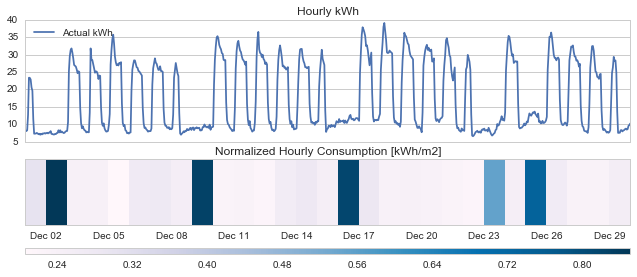

In [137]:
plot_line_example(df, df_loadratio, "PuBu")
plt.savefig(os.path.join(repos_path,"reports/figures/featureoverviews/loadratio_example.png"));

In [138]:
#sns.palplot(sns.light_palette("viridis"))

# Overview heatmap

In [143]:
def heatmap_data(df):
    x = mdates.drange(df.index[0], df.index[-1] + datetime.timedelta(days=1), datetime.timedelta(days=1))
    y = np.linspace(0, len(df.columns), len(df.columns)+1)
    return x,y

#This function changes the year for all of the buildings so that they can be overlapped for plotting
# THE RESULTING DATAFRAME IS ONLY FOR "GENERALIZED" PLOTTING TO GET THE DATA SETS TO OVERLAP -- DON'T PERFORM CALCULATIONS ON IT

def changeto2015(x):
    try:
        return x.replace(year=2015)
    except:
        return np.nan
    
def is_leap_and_29Feb(s):
    return (s.index.year % 4 == 0) & ((s.index.year % 100 != 0) | (s.index.year % 400 == 0)) & (s.index.month == 2) & (s.index.day == 29)

def generalize_timestamp_forplotting(meta, temp):
    temp_generalized = pd.DataFrame()
    buildinglist = list(meta.index)
    
    for building in buildinglist:
        #Change to timezone
        timezone = meta.T[building].timezone
        start = meta.T[building].datastart
        end = meta.T[building].dataend
        building_data = pd.DataFrame(temp[building].tz_convert(timezone).truncate(before=start,after=end))
        
        #Remove leap year day for 2012
        mask = is_leap_and_29Feb(building_data)
        building_data = building_data.loc[~mask]
        
        #Change to 2015 -- we arbitrarily use this year
        building_data.index = building_data.index.map(lambda t: changeto2015(t))
        
        #Remove tz awareness, resample to normalize the timestamps and ffill to get rid of the gaps
        building_data = building_data.tz_localize(None)
        building_data = building_data.resample('D').mean().sort_index()
        building_data = building_data.ffill()
        
        #Merge into dataset
        temp_generalized = pd.merge(temp_generalized, building_data, right_index=True, left_index=True, how='outer')
        temp_generalized = temp_generalized.resample('D').mean().sort_index()
        
        #print "finished building: "+building
    return temp_generalized

def generalize_timestamp_forplotting_notz(meta, temp):
    temp_generalized = pd.DataFrame()
    buildinglist = list(meta.index)
    
    for building in buildinglist:
        #Change to timezone
        start = meta.T[building].datastart
        end = meta.T[building].dataend
        building_data = pd.DataFrame(temp[building].truncate(before=start,after=end))
        
        #Remove leap year day for 2012
        mask = is_leap_and_29Feb(building_data)
        building_data = building_data.loc[~mask]
        
        #Change to 2015 -- we arbitrarily use this year
        building_data.index = building_data.index.map(lambda t: changeto2015(t))
        
        #Remove tz awareness, resample to normalize the timestamps and ffill to get rid of the gaps
        building_data = building_data.tz_localize(None)
        building_data = building_data.resample('D').mean().sort_index()
        building_data = building_data.ffill()
        
        #Merge into dataset
        temp_generalized = pd.merge(temp_generalized, building_data, right_index=True, left_index=True, how='outer')
        temp_generalized = temp_generalized.resample('D').mean().sort_index()
        
        #print "finished building: "+building
    return temp_generalized

def plotmap(df, color, cbarlabel, xaxislabel, yaxislabel, graphiclabel, filelabel):
    
    import matplotlib.dates as mdates
    from matplotlib import ticker
    import datetime
    import matplotlib
    import seaborn as sns

    # Set up the size/style
    sns.set(rc={"figure.figsize": (12,15)})
    sns.set_style("whitegrid")
    
    numberofplots = 1
    
    fig = plt.figure()
    
    x = mdates.drange(df.index[0], df.index[-1] + datetime.timedelta(days=1), datetime.timedelta(days=1))
    y = np.linspace(0, len(df.columns), len(df.columns)+1)
    ax = fig.add_subplot(numberofplots, 1, 1)
    data = np.array(df.T)
    datam = np.ma.array(data, mask=np.isnan(data))
    cmap = matplotlib.cm.get_cmap(color)
    qmesh = ax.pcolormesh(x, y, datam, cmap=cmap)
    
    cbaxes = fig.add_axes([0.15, 0.15, 0.7, 0.02]) 
    cbar = fig.colorbar(qmesh, ax=ax, orientation='horizontal', cax=cbaxes)
    
    cbar.ax.tick_params(length = 0)
    cbar.set_label(cbarlabel)
    
    ax.axis('tight')
    ax.xaxis_date()
    fig.autofmt_xdate()
    fig.subplots_adjust(hspace=.5)
    ax.set_xlabel(xaxislabel)
    ax.set_ylabel(yaxislabel)
    ax.set_title(graphiclabel)
    
    ax.set_yticklabels(df.columns)
    tick_locator = ticker.MaxNLocator(nbins=110)
    loc = ticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    ax.locator_params(axis='y', nbins=100)
    myFmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_formatter(myFmt)

#     T=np.arange(len(df.columns))+0.5
#     ax.set_yticks(T)
#     plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    #plt.savefig(filelabel+".png", dpi=500)

def plotmap_subplots(df, meta, color, cbarlabel, xaxislabel, yaxislabel, graphiclabel, filelabel, z_min, z_max):

    import matplotlib.dates as mdates
    from matplotlib import ticker
    import datetime
    import matplotlib
    import seaborn as sns

    # Set up the size/style
    sns.set(rc={"figure.figsize": (12,15)})
    sns.set_style("whitegrid")
    cmap = matplotlib.cm.get_cmap(color)

    #numberofplots = 1
    
    fig = plt.figure()
    fig.autofmt_xdate()
    fig.subplots_adjust(hspace=.5)
    gs = GridSpec(100,100,bottom=0.18,left=0.18,right=0.88)
    
    # Plot Offices
    df_office = df[df.columns[df.columns.str.contains("Office")]]
    office_height = int(len(df_office.T)/len(df.T)*100-2)
    ax1 = fig.add_subplot(gs[1:office_height,:])
    x,y = heatmap_data(df_office)
    data = np.array(df_office.T)
    datam = np.ma.array(data, mask=np.isnan(df_office))
    qmesh = ax1.pcolormesh(x, y, datam, cmap=cmap, vmin=z_min, vmax=z_max)
#     ax1.set_yticklabels(df_office.columns)
#     numofbins = len(df_office.T)/5
#     tick_locator = ticker.MaxNLocator(nbins=numofbins)
#     loc = ticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
 #   ax1.locator_params(axis='y', nbins=numofbins)
    ax1.axis('tight')
    ax1.xaxis_date()
    ax1.set_title("Offices")
    ax1.xaxis.set_visible(False)
    
    # Plot UnivLab
    df_lab = df[df.columns[df.columns.str.contains("UnivLab")]]
    lab_height = int(len(df_lab.T)/len(df.T)*100-2)
    ax2 = fig.add_subplot(gs[office_height+2:office_height+lab_height,:])
    x,y = heatmap_data(df_lab)
    data = np.array(df_lab.T)
    datam = np.ma.array(data, mask=np.isnan(df_lab))
    qmesh = ax2.pcolormesh(x, y, datam, cmap=cmap, vmin=z_min, vmax=z_max)
    ax2.axis('tight')
    ax2.xaxis_date()
    ax2.set_title("University Labs")
    ax2.xaxis.set_visible(False)
    
    # Plot UnivClass
    df_uniclass = df[df.columns[df.columns.str.contains("UnivClass")]]
    uniclass_height = int(len(df_uniclass.T)/len(df.T)*100-2)
    ax3 = fig.add_subplot(gs[office_height+lab_height+2:office_height+lab_height+uniclass_height,:])
    x,y = heatmap_data(df_uniclass)
    data = np.array(df_uniclass.T)
    datam = np.ma.array(data, mask=np.isnan(df_uniclass))
    qmesh = ax3.pcolormesh(x, y, datam, cmap=cmap, vmin=z_min, vmax=z_max)
    ax3.axis('tight')
    ax3.xaxis_date()
    ax3.set_title("University Classrooms")
    ax3.xaxis.set_visible(False)

    # Plot PrimClass
    df_primclass = df[df.columns[df.columns.str.contains("PrimClass")]]
    primclass_height = int(len(df_primclass.T)/len(df.T)*100-2)
    ax4 = fig.add_subplot(gs[office_height+lab_height+uniclass_height+2:office_height+lab_height+uniclass_height+primclass_height,:])
    x,y = heatmap_data(df_primclass)
    data = np.array(df_primclass.T)
    datam = np.ma.array(data, mask=np.isnan(df_primclass))
    qmesh = ax4.pcolormesh(x, y, datam, cmap=cmap, vmin=z_min, vmax=z_max)
    ax4.axis('tight')
    ax4.xaxis_date()
    ax4.set_title("Primary/Secondary Classroom")
    ax4.xaxis.set_visible(False)

    
    # Plot Univ Dorms
    df_unidorm = df[df.columns[df.columns.str.contains("UnivDorm")]]
    unidorm_height = int(len(df_unidorm.T)/len(df.T)*100-2)
    ax5 = fig.add_subplot(gs[office_height+lab_height+uniclass_height+primclass_height+2:office_height+lab_height+uniclass_height+primclass_height+unidorm_height,:])
    x,y = heatmap_data(df_unidorm)
    data = np.array(df_unidorm.T)
    datam = np.ma.array(data, mask=np.isnan(df_unidorm))
    qmesh = ax5.pcolormesh(x, y, datam, cmap=cmap, vmin=z_min, vmax=z_max)
    ax5.axis('tight')
    ax5.xaxis_date()
    ax5.set_title("University Dorms")
    
    cbaxes = fig.add_axes([0.18, 0.23, 0.7, 0.02]) 
    cbar = fig.colorbar(qmesh, orientation='horizontal', cax=cbaxes) #ax=ax,
    
    cbar.ax.tick_params(length = 0)
    cbar.set_label(cbarlabel)

    myFmt = mdates.DateFormatter('%b')
    ax5.xaxis.set_major_formatter(myFmt)
    
    fig.text(0.14, 0.5, yaxislabel, va='center', rotation='vertical')

    #plt.subplots_adjust(bottom=0.2)
    #plt.savefig(filelabel+".png", dpi=500)maps import *

In [144]:
#temp_residuals_normalized.describe().T["count"].value_counts()

In [150]:
#temp_loadratio

In [145]:
temp_loadratio_generalized = generalize_timestamp_forplotting_notz(meta, temp_loadratio)

In [152]:
#temp_loadratio_generalized.head()

In [153]:
temp_loadratio_generalized_sorted = temp_loadratio_generalized[list(temp_loadratio_generalized.sum().sort_values().index)]

In [154]:
temp_loadratio_generalized_sorted.head()#.describe().T.describe()

,PrimClass_Janice,PrimClass_Jaiden,PrimClass_Ulysses,PrimClass_Javier,PrimClass_Jazmin,PrimClass_Umar,UnivClass_Ariana,UnivClass_Alec,UnivClass_Alvin,UnivClass_Tamra,...,UnivLab_Ashlynn,UnivLab_Caitlin,UnivLab_Margret,UnivLab_Allan,UnivLab_Patsy,UnivLab_Alberto,UnivLab_Anita,UnivLab_Alisa,UnivLab_Aoife,UnivLab_Crystal
2015-01-01,0.067308,0.075269,0.333333,0.419355,0.079341,0.266667,0.222222,0.312730,0.202375,0.329670,...,0.966913,0.965180,0.971717,0.969776,0.944509,0.971306,0.985550,0.978742,0.973121,0.979798
2015-01-02,0.047059,0.109091,0.090909,0.013964,0.089437,0.133333,0.105945,0.090230,0.171338,0.382099,...,0.923287,0.964976,0.907021,0.919648,0.902858,0.923372,0.969391,0.958129,0.971139,0.911215
2015-01-03,0.046784,0.154930,0.085106,0.531250,0.099811,0.113636,0.166726,0.093333,0.277617,0.157480,...,0.959854,0.920985,0.934394,0.962928,0.937004,0.973610,0.968484,0.970480,0.964718,0.902326
2015-01-04,0.052288,0.044776,0.060000,0.666667,0.096759,0.105263,0.221942,0.092452,0.274068,0.377669,...,0.972101,0.922156,0.947262,0.967339,0.941611,0.973781,0.930633,0.963086,0.968591,0.945813
2015-01-05,0.050000,0.205939,0.285714,0.129534,0.141157,0.333333,0.124713,0.105227,0.158306,0.287842,...,0.876230,0.908934,0.896422,0.865149,0.909052,0.901941,0.916925,0.921694,0.934007,0.881818


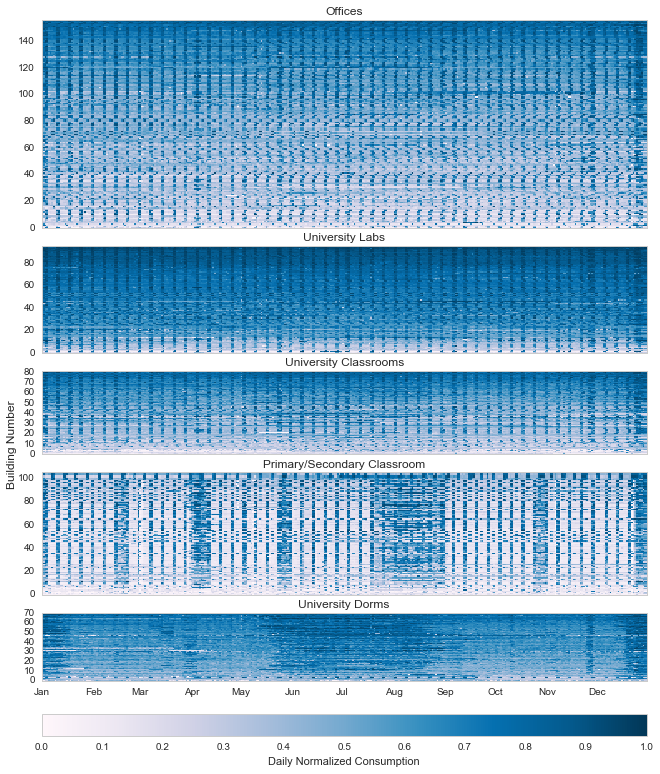

In [155]:
plotmap_subplots(temp_loadratio_generalized_sorted, meta, 'PuBu', "Daily Normalized Consumption",
                 "Timeline", "Building Number", "kWh Difference", "Daily Normalized Consumption [kWh/m2]", 0, 1)
plt.savefig(os.path.join(repos_path,"reports/figures/featureoverviews/loadratio_heatmap.png"));